<a href="https://colab.research.google.com/github/hukim1112/MLDL/blob/master/lecture9/Text_Preprocessing_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텍스트 전처리 (Text Preprocessing)

# 01) 토큰화(Toknization)

자연어 처리에서 크롤링 등 으로 얻어낸 코퍼스 데이터가필요에 맞게 전처리되지 않은 상태라면 해당 데이터를 사용하고자 하는 용도에 맞게 
1. 토큰화 (tokenization)
2. 정제 (cleaning)
3. 정규화 (normalization)

하는 일을 하게 된다.

토큰화
: 주어진 코퍼스(corpus)에서 토큰(token)이라 불리는 단위로 나누는 작업을 토큰화(tokenization)라고 부른다. 토큰의 단위는 상황에 따라 다르지만, 보통 의미있는 단위로 토큰을 정의한다.

[wikidocs](https://wikidocs.net/21698)

## 1. 단어 토큰화 (Word Toknization)
토큰의 기준을 단어(word)로 하는 경우, 단어 토큰화(word tokenization)라고 합니다. 다만, 여기서 단어(word)는 단어 단위 외에도 단어구, 의미를 갖는 문자열로도 간주되기도 합니다.

예를 들어, 아래의 입력으로부터 구두점(punctuation)과 같은 문자는 제외시키는 간단한 단어 토큰화 작업을 해봅시다.
 - 구두점 : 마침표(.), 쉼표(,), 물음표(?), 세미콜론(;), 느낌표(!) 등 과 같은 기호

입력 : **Time is an illusion. Lunchtime double so!**

출력 : "Time", "is", "an", "illustion", "Lunchtime", "double", "so"

이 기초적인 예제에서는 구두점을 지운 뒤에 띄어쓰기(whitespace)를 기준으로 잘라냄으로 토큰화를 진행하였습니다.

보통 토큰화 작업은 단순히 구두점이나 특수문자를 전부 제거하는 정제(cleaning) 작업을 수행하는 것만으로 해결되지 않습니다. 구두점이나 특수문자를 전부 제거하면 토큰이 의미를 잃어버리는 경우가 발생하기도 합니다. 심지어 띄어쓰기 단위로 자르면 사실상 단어 토큰이 구분되는 영어와 달리, 한국어는 띄어쓰기만으로는 단어 토큰을 구분하기 어렵습니다. 그 이유는 뒤에서 언급하도록 하겠습니다.

## 토큰화 중 생기는 선택의 순간
토큰화를 하다보면, 토큰화의 기준을 생각해봐야 하는 경우가 발생한다. 이러한 선택은 해당 데이터를 가지고 어떤 용도로 사용할 것인지에 따라, 그 용도에 영향이 없는 기준으로 정하면 된다.

예:
**Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.**
- Don't, Jone's를 토큰화 하는 방법?
  - Don't
  - Don t
  - Dont
  - Do n't
  - Jone's
  - Jone s
  - Jone
  - Jones

원하는 결과가 나오도록 토큰화 도구를 직접 설계할 수도 있지만, 토큰화를 도와주는 모듈이 존재한다. 

NLTK는 영어 corpus를 토큰화 하기 위한 도구를 제공한다. 그 중 word_tokenize와 WordPunctTokenizer를 사용하여 (')를 어떻게 처리하는지 확인해보자
 - NLTK

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
from nltk.tokenize import word_tokenize  
print(word_tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop.")) 

['Do', "n't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr.', 'Jone', "'s", 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


word_tokenize는 Don't를 Do와 n't로 분리하였으며, 반면 Jone's는 Jone과 's로 분리한 것을 확인할 수 있습니다.


- wordPunctTokenizer

In [3]:
from nltk.tokenize import WordPunctTokenizer  
print(WordPunctTokenizer().tokenize("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

['Don', "'", 't', 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', ',', 'Mr', '.', 'Jone', "'", 's', 'Orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop', '.']


WordPunctTokenizer는 구두점을 별도로 분류하는 특징을 갖고 있기때문에, 앞서 확인했던 word_tokenize와는 달리 Don't를 Don과 '와 t로 분리하였으며, 이와 마찬가지로 Jone's를 Jone과 '와 s로 분리한 것을 확인할 수 있습니다.

 - 케라스 - text_to_word_sequence

In [4]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence
print(text_to_word_sequence("Don't be fooled by the dark sounding name, Mr. Jone's Orphanage is as cheery as cheery goes for a pastry shop."))

["don't", 'be', 'fooled', 'by', 'the', 'dark', 'sounding', 'name', 'mr', "jone's", 'orphanage', 'is', 'as', 'cheery', 'as', 'cheery', 'goes', 'for', 'a', 'pastry', 'shop']


케라스의 text_to_word_sequence는 기본적으로 모든 알파벳을 소문자로 바꾸면서 마침표나 컴마, 느낌표 등의 구두점을 제거합니다. 하지만 don't나 jone's와 같은 경우 아포스트로피는 보존하는 것을 볼 수 있습니다.

## 3. 토큰화에서 고려해야할 사항
토큰화를 단순히 구두점을 제외하고 공백으로 잘라내는 작업이라고 간주할 수는 없다.

1. 구두점이나 특수문자를 단순 제외해서는 안됨

  코퍼스에 대한 정제 작업을 진행하다보면, 구두점도 하나의 토큰으로 분류하기도 한다. 

  - 마침표(.)의 경우 문장의 경계를 알 수 있음
  - 단어 자체의 구두점 
    - e.g. $45.55, 2021.09.13 1,000,000
2. 줄임말과 단어 내에 띄어쓰기가 있는 경우
  
  - 토큰화 작업에서 종종 영어권의 (')는 압축된 단어를 펼치는 역할을 하기도 한다. e.g. we're - we are, I'm - I am
  - New York, rock 'n' roll 하나의 단어이지만 중간에 띄어쓰기가 존재. 이런 단어를 하나의 단어로 인식할 수 있는 능력이 필요하다.

3. 표준 토큰화 예제
표준으로 쓰이고 있는 토큰화 방법 중 하나인 **Penn Treebank Tokenization의 규칙**에 대해 소개하고 결과를 보도록 하겠습니다.

  규칙 1. 하이픈(-)으로 구성된 단어는 하나로 유지
  
  규칙 2. doesn't와 같이 (')로 줄여쓰는 단어는 분리





In [5]:
from nltk.tokenize import TreebankWordTokenizer
tokenizer=TreebankWordTokenizer()
text="Starting a home-based restaurant may be an ideal. it doesn't have a food chain or restaurant of their own."
print(tokenizer.tokenize(text))

['Starting', 'a', 'home-based', 'restaurant', 'may', 'be', 'an', 'ideal.', 'it', 'does', "n't", 'have', 'a', 'food', 'chain', 'or', 'restaurant', 'of', 'their', 'own', '.']


각각 규칙1과 규칙2에 따라서 home-based는 하나의 토큰으로 취급하고 있으며, dosen't의 경우 does와 n't는 분리되었음을 볼 수 있습니다.

## 4. 문장 토큰화 (Sentence Tokenization) - 문장분류
토큰의 단위가 문장(sentence)일 떄, 어떻게 토큰화를 수행해야할지 논의합니다.

문장 단위로 분류하는 직관적인 방법은 ?, ., ! 로 문장을 구분하는 것이다. 
하지만 !와 ?는 꽤 명확한 구분자(boundary)의 역할을 하지만 마침표는 그렇지 않다.

EX1) IP 192.168.56.31 서버에 들어가서 로그 파일 저장해서 abc123@gmail.com로 결과 좀 보내줘. 그러고나서 점심 먹으러 가자.

In [6]:
from nltk.tokenize import sent_tokenize
text="His barber kept his word. But keeping such a huge secret to himself was driving him crazy. Finally, the barber went up a mountain and almost to the edge of a cliff. He dug a hole in the midst of some reeds. He looked about, to make sure no one was near."
print(sent_tokenize(text))

['His barber kept his word.', 'But keeping such a huge secret to himself was driving him crazy.', 'Finally, the barber went up a mountain and almost to the edge of a cliff.', 'He dug a hole in the midst of some reeds.', 'He looked about, to make sure no one was near.']


마침표가 여러번 등장하는 경우

In [7]:
from nltk.tokenize import sent_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D student."
print(sent_tokenize(text))

['I am actively looking for Ph.D. students.', 'and you are a Ph.D student.']


NLTK는 단순히 마침표를 구분자로 하여 문장을 구분하지 않았기 때문에, Ph.D.를 문장 내의 단어로 인식하여 성공적으로 인식하는 것을 볼 수 있습니다.

한국어 문장 토큰화 도구 또한 존재한다. 
 - KSS(Korean Sentence Splitter)

In [8]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 170 kB 50.7 MB/s 
  Created wheel for kss: filename=kss-3.3.1.1-py3-none-any.whl size=42449239 sha256=919e5fafa60d237a50de9b9207989baf0b9ebef7044a4ea8e32d12783eeecd2e
  Stored in directory: /root/.cache/pip/wheels/6e/9d/1d/52871154eff5273abb86b96f4f984c1cd67c5bde64239b060a
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=7b9f1e8ded33d872698708123cb225aa393585ff5984d567f9dd0f3ff3e2c81f
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built kss emoji


In [9]:
import kss

text='딥 러닝 자연어 처리가 재미있기는 합니다. 그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요. 이제 해보면 알걸요?'
print(kss.split_sentences(text))

[Korean Sentence Splitter]: Initializing Pynori...


['딥 러닝 자연어 처리가 재미있기는 합니다.', '그런데 문제는 영어보다 한국어로 할 때 너무 어려워요. 농담아니에요.', '이제 해보면 알걸요?']


In [10]:
text='오늘은 2021.09.13 이에요. 날씨는 맑아요!'
print(kss.split_sentences(text))

['오늘은 2021.09.13 이에요.', '날씨는 맑아요!']


## 5. 이진 분류기(Binary Classifier)

문장 토큰화에서 예외를 발생시키는 마침표의 처리를 위해 입력에 따라 두개의 클래스로 분류하는 이진 분류기(binary classifier)를 사용하기도 합니다.

1. 마침표(.)가 단어의 일부분일 경우. 즉, 마침표가 약어(abbreivation)로 쓰이는 경우
2. 마침표(.)가 정말로 문장의 구분자(boundary)일 경우

이진 분류기는 앞서 언급했듯이, 임의로 정한 여러가지 규칙을 코딩한 함수일 수도 있으며, 머신 러닝을 통해 이진 분류기를 구현하기도 합니다.

마침표(.)가 어떤 클래스에 속하는지 결정을 위해서는 어떤 마침표가 주로 약어(abbreviation)으로 쓰이는 지 알아야합니다. 
 - [약어 사전(abbreviation dictionary)](https://public.oed.com/how-to-use-the-oed/abbreviations/)


이러한 문장 토큰화를 수행하는 오픈 소스로는 NLTK, OpenNLP, 스탠포드 CoreNLP, splitta, LingPipe 등이 있습니다.
 
문장 토큰화 규칙을 짤 때, 발생할 수 있는 여러가지 예외사항을 다룬 [참고 자료](https://www.grammarly.com/blog/engineering/how-to-split-sentences/)


## 6. 한국어 토큰화의 어려움
영어는 New York과 같은 합성어나, he's와 같은 줄임말에 대한 예외처리만 한다면 띄어쓰기(white space)를 기준으로 하는 띄어쓰기 토큰화를 해도 단어 토큰화가 잘 작동한다.
 - 대부분의 경우에서 단어단위로 띄어쓰기가 이루어짐

하지만 한국어는 띄어쓰기만으로 토큰화를 하기가 부족하다. 띄어쓰기의 단위를 '어절'이라고 하는데 어절토큰화가 단어토큰화와 같지 않기 때문에 지양된다.

1. 한국어는 교착어이다.
  - 교착어 : 조사, 어미 등을 붙여서 말을 만듦

  그라는 단어 하나에도 '그가', '그에게', '그를', '그와', '그는'과 같이 다양한 조사가 '그'라는 글자 뒤에 띄어쓰기 없이 바로 붙게됩니다. 

  같은 단어임에도 다른 조사가 붙어 다른 단어로 인식되면 번거로워지는 경우가 많다. -> 한국어 NLP에서 조사를 분리해야 한다.

 =>  **형태소(morpheme, 뜻을 가진 가장 작은 말의 단위)** 토큰화를 수행하여야 한다.

 - 문장 : 에디가 딥러닝책을 읽었다

    - 자립 형태소 : 에디, 딥러닝책
    - 의존 형태소 : -가, -을, 읽-, -었, -다



2. 한국어는 띄어쓰기가 영어보다 잘 지켜지지 않는다.

 EX1) 제가이렇게띄어쓰기를전혀하지않고글을썼다고하더라도글을이해할수있습니다.

 EX2) Tobeornottobethatisthequestion

## 7. 품사 태깅(Part-of-speech tagging)
단어의 표기는 같지만, 품사에 따라 의미가 달라진다.

- fly
  - v : 날다
  - n : 파리

- 못
  - 동작 동사(먹다, 달리다 ..) 를 할 수 없다는 의미
  - 목재 따위를 고정하는 물건

즉, 단어의 의미를 제대로 파악하기 위해 품사를 파악하는 것이 지표가 될 수 있다. 이에 따라 단어 토큰화 과정에서 각 단어의 품사를 구분하기도 하는데 이러한 작업을 품사 태깅(part-of-speech tagging)이라고 한다.

## 8. NLTK와 KoNLPy를 이용한 영어, 한국어 토큰화 실습
 - NLTK 
   - 영어 코퍼스에 품사 태깅 - Penn Treebank POG Tags 기준 사용

In [11]:
from nltk.tokenize import word_tokenize
text="I am actively looking for Ph.D. students. and you are a Ph.D. student."
print(word_tokenize(text))

['I', 'am', 'actively', 'looking', 'for', 'Ph.D.', 'students', '.', 'and', 'you', 'are', 'a', 'Ph.D.', 'student', '.']


In [12]:
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
x=word_tokenize(text)
pos_tag(x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('I', 'PRP'),
 ('am', 'VBP'),
 ('actively', 'RB'),
 ('looking', 'VBG'),
 ('for', 'IN'),
 ('Ph.D.', 'NNP'),
 ('students', 'NNS'),
 ('.', '.'),
 ('and', 'CC'),
 ('you', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('Ph.D.', 'NNP'),
 ('student', 'NN'),
 ('.', '.')]

PRP는 인칭 대명사, VBP는 동사, RB는 부사, VBG는 현재부사, IN은 전치사, NNP는 고유 명사, NNS는 복수형 명사, CC는 접속사, DT는 관사를 의미

- KoNLPy : 한국어 자연어 처리기
  - 형태소 분석기 : Okt(Open Korea Text), 메캅(Mecab), 코모란(Komoran), 한나눔(Hannanum), 꼬꼬마(Kkma)
  - 설치 [참고자료](https://mr-doosun.tistory.com/21)

In [13]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 49.2 MB/s 
     |████████████████████████████████| 448 kB 61.7 MB/s 
     |████████████████████████████████| 86 kB 4.8 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [14]:
from konlpy.tag import Okt  
okt=Okt()  
print(okt.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '한', '당신', ',', '연휴', '에는', '여행', '을', '가봐요']


In [15]:
print(okt.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'Adverb'), ('코딩', 'Noun'), ('한', 'Josa'), ('당신', 'Noun'), (',', 'Punctuation'), ('연휴', 'Noun'), ('에는', 'Josa'), ('여행', 'Noun'), ('을', 'Josa'), ('가봐요', 'Verb')]


In [16]:
print(okt.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


1. morphs : 형태소 추출
2. pos : 품사 태깅(Part-of-speech tagging)
3. nouns : 명사 추출

In [17]:
from konlpy.tag import Kkma  
kkma=Kkma()  
print(kkma.morphs("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))

['열심히', '코딩', '하', 'ㄴ', '당신', ',', '연휴', '에', '는', '여행', '을', '가보', '아요']


In [18]:
print(kkma.pos("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

[('열심히', 'MAG'), ('코딩', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('당신', 'NP'), (',', 'SP'), ('연휴', 'NNG'), ('에', 'JKM'), ('는', 'JX'), ('여행', 'NNG'), ('을', 'JKO'), ('가보', 'VV'), ('아요', 'EFN')]


In [19]:
print(kkma.nouns("열심히 코딩한 당신, 연휴에는 여행을 가봐요"))  

['코딩', '당신', '연휴', '여행']


각 형태소 분석기는 성능과 결과가 다르게 나오기 때문에, 형태소 분석기의 선택은 사용하고자 하는 필요 용도에 어떤 형태소 분석기가 가장 적절한지를 판단하고 사용하면 됩니다. 

한국어 형태소 분석기 성능 비교 : https://passerby14.tistory.com/3

# 02) 정제(Cleaning) and 정규화(Normalization)
코퍼스에서 용도에 맞게 토큰을 분류하는 작업을 토큰화(tokenization)라고 하며, 토큰화 작업 전, 후에는 텍스트 데이터를 용도에 맞게 정제(cleaning) 및 정규화(normalization)하는 일이 함께한다. 

목적
- 정제(cleaning) : 가지고 있는 코퍼스로부터 노이즈를 제거한다.
- 정규화(normalization) : 표현 방법이 다른 단어들을 통합시켜 같은 단어로 만들어준다.

## 1. 규칙에 기반한 표기가 다른 단어들의 통합

 - US vs USA

같은 의미를 가지므로 하나의 단어로 정규화 할 수 있다.
=> 표기가 다른 단어들을 통합하는 방법인 **어간 추출(stemming)**과 **표제어 추출(lemmatizaiton)**

## 2. 대, 소문자 통합
영어권 언어에서 대, 소문자를 통합하는 것은 단어의 개수를 줄이는 정규화 방법. 

## 3. 불필요한 단어의 제거(Removing Unnecessary Words)

정제 작업에서 제거해야하는 노이즈 데이터(noise data)
- 자연어가 아니면서 아무 의미도 갖지 않는 글자들(특수 문자 등)
- 분석하고자 하는 목적에 맞지 않는 불필요 단어

불필요 단어들을 제거하는 방법
 - 불용어 제거 (다음 챕터)
 - 등장빈도가 적은 단어, 길이가 짧은 단어 제거

####  (1) 등장 빈도가 적은 단어(Removing Rare words)
e.g. 메일이 정상, 스팸을 판별하기 위해 100,000개의 메일 중 5번 밖에 등장하지 않은 단어는 분류에 도움 X

#### (2) 길이가 짧은 단어(Removing words with a very short length)
영어권에서는 길이가 짧은 단어를 삭제하는 것 만으로도 어느정도 자연어 처리에서 크게 의미가 없는 단어들을 제거하는 효과가 있다.

- en : d r a g o n
- ko : 용(龍)

하지만 한국어는 한자어가 많고, 한 글자 만으로도 의미를 가진 경우가 많다.

In [20]:
# 길이가 1~2인 단어들을 정규 표현식을 이용하여 삭제
import re
text = "I was wondering if anyone out there could enlighten me on this car."
shortword = re.compile(r'\W*\b\w{1,2}\b')
print(shortword.sub('', text))

 was wondering anyone out there could enlighten this car.


## 4. 정규 표현식(Regular Expression)
얻어낸 코퍼스에서 노이즈 데이터의 특징을 잡아낼 수 있다면, 정규표현식을 통해서 이를 제거할 수 있는 경우가 많다.
- e.g. HTML문서 -> HTML태그가 많이 존재

# 03) 어간 추출(Stemming) and 표제어 추출(Lemmatization)

정규화 기법 중 코퍼스에 있는 단어 개수를 줄일 수 있는 기법

## 표제어 추출 (Lemmatization)
표제어(Lemma)는 기본 사전형 단어 정도의 의미를 갖는다.
 - is, am, are은 서로 다른 스펠링이지만 표제어는 be

표제어를 추출하는 가장 섬세한 방법은 단어 형태학적 파싱을 먼저 진행하는 것

형태소: 의미를 가진 가장 작은 단위

형태학(morphology) : 형태소로부터 단어들을 만들어가는 학문

1. 어간(stem):  단어의 의미를 담고있는 핵심부분
2. 접사(affix) : 단어에 추가적인 의미를 주는 부분

형태학적 파싱이란 이를 분리하는 작업
- e.g. cats : cat(stem) + -s(affix)

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
from nltk.stem import WordNetLemmatizer
n=WordNetLemmatizer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([n.lemmatize(w) for w in words])

['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


후에 어간 추출(stemming)에 대해서 배우고, 같은 입력에 대한 결과를 비교해보시면 알겠지만 표제어 추출은 어간 추출과는 달리 **단어의 형태가 적절히 보존되는 양상**을 보이는 특징이 있습니다. 

하지만 그럼에도 위의 결과에서는 dy나 ha와 같이 의미를 알 수 없는 적절하지 못한 단어를 출력하고 있습니다. 

이는 표제어 추출기(lemmatizer)가 본래 단어의 품사 정보를 알아야만 정확한 결과를 얻을 수 있기 때문입니다.

In [23]:
n.lemmatize('dies', 'v')

'die'

In [24]:
n.lemmatize('watched', 'v')

'watch'

In [25]:
n.lemmatize('has', 'v')

'have'

In [44]:
n.lemmatize('going', 'v')

'go'

#### 표제어추출 vs 어간추출
표제어 추출은 문맥을 고려하며, 수행했을 때의 결과는 해당 단어의 품사 정보를 보존합니다. (POS 태그를 보존)

하지만, 어간 추출을 수행한 결과는 품사 정보가 보존되지 않습니다. (다시 말해 POS 태그를 고려X) 더 정확히는, 어간 추출을 한 결과는 사전에 존재하지 않는 단어일 경우가 많습니다.

## 2. 어간 추출(Stemming)
어간(Stem)을 추출하는 작업을 어간 추출(Stemming)이라고 한다.
결과 단어는 사전에 존재하지 않는 단어일 수 있다.


In [26]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
s = PorterStemmer()
text="This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
words=word_tokenize(text)
print(words)

['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']


In [27]:
print([s.stem(w) for w in words])

['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


위의 어간 추출은 단순 규칙에 기반하여 이루어지기 떄문에 사전에 없는 단어를 포함한다.

예를들어, 포터 알고리즘의 어간 추출은 다음의 규칙을 가진다.
 - ALIZE → AL
 - ANCE → 제거
 - ICAL → IC

In [28]:
words=['formalize', 'allowance', 'electricical']
print([s.stem(w) for w in words])
# formalize → formal
# allowance → allow
# electricical → electric

['formal', 'allow', 'electric']


포터 어간 추출 vs 랭커스터 어간 추출
#### Stemming
 - am → am
 - the going → the go
 - having → hav

#### Lemmatization
 - am → be
 - the going → the going
 - having → have

In [29]:
from nltk.stem import PorterStemmer
s=PorterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([s.stem(w) for w in words])

['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']


In [30]:
from nltk.stem import LancasterStemmer
l=LancasterStemmer()
words=['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print([l.stem(w) for w in words])

['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


## 3. 한국어에서의 어간 추출
아래 사진과 같이 한국어는 5언 9품사의 구조를 지닌다.

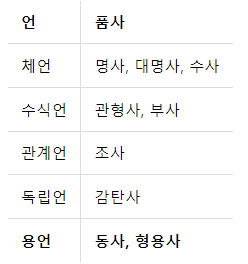

이 중 용언의 '동사'와 '형용사'는 어간과 어미의 결합으로 구성된다.

####  (1) 활용(conjugation)
활용이란 용언의 어간이 어미를 가지는 일
- 어간(stem) : 용언(동사, 형용사)을 활용할 때, 원칙적으로 모양이 변하지 않는 부분. 활용에서 어미에 선행하는 부분. 때론 어간의 모양도 바뀔 수 있음(예: 긋다, 긋고, 그어서, 그어라).

- 어미(ending): 용언의 어간 뒤에 붙어서 활용하면서 변하는 부분이며, 여러 문법적 기능을 수행

1. 규칙 활용 : 어간의 모습이 일정
2. 불규칙 활용 : 어간이나 어미의 모습이 변함

#### (2) 규칙 활용
규칙활용: 어간이 어미를 취할 때, 어간의 모습이 일정

``` 잡/어간 + 다/어미```

어간이 어미가 붙기전의 모습과 어미가 붙은 후의 모습이 같으므로, 규칙 기반으로 어미를 단순히 분리해주면 어간 추출이 된다.

#### (3) 불규칙 활용
불규칙 활용: 어간이 어미를 취할 때 어간의 모습이 바뀌거나 취하는 어미가 특수한 어미일 경우

- 어간의 형식이 달라지는 경우
   - ‘듣-, 돕-, 곱-, 잇-, 오르-, 노랗-’ -> ‘듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-’
- 특수한 어미를 취하는 경우
   -  ‘오르+ 아/어→올라, 하+아/어→하여, 이르+아/어→이르러, 푸르+아/어→푸르러’


다양한 불규칙 활용의 예를 보여줍니다.

링크 : https://namu.wiki/w/한국어/불규칙%20활용



# 04) 불용어(Stopword)

가지고 있는 데이터에서 유의미한 단어 토큰만을 선별하기 위해서는 큰 의미가 없는 단어 토큰을 제거하는 작업이 필요하다.
 - I, my, me, over, 조사, 접미사 같은 단어들은 문장에서는 자주 등장하지만 실제 의미 분석을 하는데는 거의 기여하는 바가 없는 경우

NLTK에서는 불용어로 패키지 내에서 미리 정의하고 있다.
## 1. NLTK에서 불용어 확인하기

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
from nltk.corpus import stopwords  
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

## 2. NLTK를 통해서 불용어 제거하기

In [33]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "Family is not an important thing. It's everything."
stop_words = set(stopwords.words('english')) 

word_tokens = word_tokenize(example)

result = []
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 

print(word_tokens) 
print(result) 

['Family', 'is', 'not', 'an', 'important', 'thing', '.', 'It', "'s", 'everything', '.']
['Family', 'important', 'thing', '.', 'It', "'s", 'everything', '.']


'is', 'not', 'an'과 같은 단어들이 제거

## 3. 한국어에서 불용어 제거하기
사용자 가 직접 불용어 사전을 만드는 경우가 많다.

In [34]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

example = "고기를 아무렇게나 구우려고 하면 안 돼. 고기라고 다 같은 게 아니거든. 예컨대 삼겹살을 구울 때는 중요한 게 있지."
stop_words = "아무거나 아무렇게나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 하면 아니거든"
# 위의 불용어는 명사가 아닌 단어 중에서 저자가 임의로 선정한 것으로 실제 의미있는 선정 기준이 아님
stop_words=stop_words.split(' ')
word_tokens = word_tokenize(example)

result = [] 
for w in word_tokens: 
    if w not in stop_words: 
        result.append(w) 
# 위의 4줄은 아래의 한 줄로 대체 가능
# result=[word for word in word_tokens if not word in stop_words]

print(word_tokens) 
print(result)

['고기를', '아무렇게나', '구우려고', '하면', '안', '돼', '.', '고기라고', '다', '같은', '게', '아니거든', '.', '예컨대', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']
['고기를', '구우려고', '안', '돼', '.', '고기라고', '다', '같은', '게', '.', '삼겹살을', '구울', '때는', '중요한', '게', '있지', '.']


아래의 링크는 보편적으로 선택할 수 있는 한국어 불용어 리스트를 보여줍니다. (절대적인 기준 x)

링크 : https://www.ranks.nl/stopwords/korean

더 좋은 방법은 코드 내에서 직접 정의하지않고 txt파일이나 csv로 불용어를 정리해놓고 불러와서 사용하는 방법이다.

# 05) 정규 표현식(Regular Expression)

https://wikidocs.net/21703

In [35]:
text = '대한민국의 국가\n애국가(愛國歌)는 대한민국의 국가이다. \n1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 〈작별〉에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 《한국환상곡》에 가사를 삽입해서 현재까지 부르고 있다.\n 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. \n윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. \n이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.\n ㅈㅏㄱㅅㅏ\n 애국가의 가사는 1900년대 초에 쓰여졌다. \n작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. \n작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. \n한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. \n1908년에 출판된 가사집 《찬미가》에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.\n 윤치호의 사촌동생 윤치영(尹致瑛)은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. \n애국가 링크 https://www.mois.go.kr/chd/sub/a05/story/screen.do \n작성자 abc123@uos.ac.kr'
print(text)

대한민국의 국가
애국가(愛國歌)는 대한민국의 국가이다. 
1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 〈작별〉에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 《한국환상곡》에 가사를 삽입해서 현재까지 부르고 있다.
 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. 
윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. 
이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.
 ㅈㅏㄱㅅㅏ
 애국가의 가사는 1900년대 초에 쓰여졌다. 
작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. 
작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. 
한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. 
1908년에 출판된 가사집 《찬미가》에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.
 윤치호의 사촌동생 윤치영(尹致瑛)은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. 
애국가 링크 https://www.mois.go.kr/chd/sub/a05/story/screen.do 
작성자 abc123@uos.ac.kr


- 한자어
- 특수기호
- 오타
- 링크
- 이메일

In [36]:
re1 = re.compile('\([一-龥]+\)|\([ぁ-ゔ]+\)|\([ァ-ヴー]+[々〆〤]+\)')
re1.findall(text)

['(愛國歌)', '(尹致瑛)']

In [37]:
text = re1.sub('', text)
print(text)

대한민국의 국가
애국가는 대한민국의 국가이다. 
1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 〈작별〉에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 《한국환상곡》에 가사를 삽입해서 현재까지 부르고 있다.
 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. 
윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. 
이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.
 ㅈㅏㄱㅅㅏ
 애국가의 가사는 1900년대 초에 쓰여졌다. 
작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. 
작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. 
한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. 
1908년에 출판된 가사집 《찬미가》에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.
 윤치호의 사촌동생 윤치영은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. 
애국가 링크 https://www.mois.go.kr/chd/sub/a05/story/screen.do 
작성자 abc123@uos.ac.kr


In [38]:
re2 = re.compile(r'[^ .,?!/@$%~％·∼()\x00-\x7F가-힣]+')
re2.findall(text)

['〈', '〉', '《', '》', 'ㅈㅏㄱㅅㅏ', '《', '》']

In [39]:
text = re2.sub('', text)
print(text)

대한민국의 국가
애국가는 대한민국의 국가이다. 
1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 작별에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 한국환상곡에 가사를 삽입해서 현재까지 부르고 있다.
 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. 
윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. 
이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.
 
 애국가의 가사는 1900년대 초에 쓰여졌다. 
작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. 
작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. 
한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. 
1908년에 출판된 가사집 찬미가에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.
 윤치호의 사촌동생 윤치영은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. 
애국가 링크 https://www.mois.go.kr/chd/sub/a05/story/screen.do 
작성자 abc123@uos.ac.kr


In [40]:
re3 = re.compile(r'\w+:\/\/\S+')
re3.findall(text)

['https://www.mois.go.kr/chd/sub/a05/story/screen.do']

In [41]:
text = re3.sub('', text)
print(text)

대한민국의 국가
애국가는 대한민국의 국가이다. 
1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 작별에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 한국환상곡에 가사를 삽입해서 현재까지 부르고 있다.
 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. 
윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. 
이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.
 
 애국가의 가사는 1900년대 초에 쓰여졌다. 
작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. 
작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. 
한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. 
1908년에 출판된 가사집 찬미가에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.
 윤치호의 사촌동생 윤치영은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. 
애국가 링크  
작성자 abc123@uos.ac.kr


In [42]:
re4 = re.compile(r'[a-zA-Z0-9+-_.]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+')
re4.findall(text)

['abc123@uos.ac.kr']

In [43]:
text = re4.sub('', text)
print(text)

대한민국의 국가
애국가는 대한민국의 국가이다. 
1919년 안창호에 의해 대한민국 임시 정부에서 스코틀랜드 민요인 작별에 삽입해서 부르기 시작하다가 1935년 한국의 작곡가 안익태가 지은 한국환상곡에 가사를 삽입해서 현재까지 부르고 있다.
 가사의 작사자는 윤치호 설, 안창호 설, 윤치호와 최병헌 합작설 등이 있다. 
윤치호의 작사설 때문에 대한민국 임시 정부에서는 애국가를 바꾸려 하였으나 대한민국 임시 정부 주석 김구의 변호로 계속 애국가로 채택하게 되었다. 
이후 1948년의 정부 수립 이후 국가로 사용되어 왔으며, 2010년 국민의례 규정에서 국민의례시 애국가를 부르거나 연주하도록 함으로써 국가로서의 역할을 간접적으로 규정하고 있다.
 
 애국가의 가사는 1900년대 초에 쓰여졌다. 
작사자는 크게 윤치호라는 설과 안창호라는 설 두 가지가 있으며, 국사편찬위원회의 공식적인 입장으로는 미상이다. 
작사자 윤치호 설은 윤치호가 애국가의 가사를 1907년에 써서 후에 그 자신의 이름으로 출판했다는 것이다. 
한편 안창호가 썼다는 주장은 안창호가 애국가를 보급하는 데에 앞장섰다는 데에 중점을 두고 있다. 
1908년에 출판된 가사집 찬미가에 수록된 것을 비롯한 많은 일제 강점기의 애국가 출판물은 윤치호를 작사자로 돌리고 있는 등 윤치호 설에는 증거가 많은 반면 안창호 설에는 실증적인 자료가 부족하다.
 윤치호의 사촌동생 윤치영은 윤치호가 대한민국의 애국가 가사의 일부를 썼다고 주장했다. 
애국가 링크  
작성자 
